In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, ARDRegression, SGDRegressor, PassiveAggressiveRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor

from models import MLP, Ensemble, FONN1, FONN2, TREENN1, TREENN2

In [2]:
# Load the Boston dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22,  # type: ignore
                     header=None)  # type: ignore
X = np.hstack([raw_df.values[::2, :-1], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape, y.shape, type(X), type(y)

((506, 12), (506,), numpy.ndarray, numpy.ndarray)

In [3]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 12), (102, 12), (404,), (102,))

In [4]:
# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    start_time = time.time()
    predictions = model.predict(X_test)
    end_time = time.time()
    comp_time = end_time - start_time

    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    return r2, mae, mse, train_time, comp_time


# Train and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Bayesian Ridge Regression": BayesianRidge(),
    "ARD Regression": ARDRegression(),
    "SGD Regressor": SGDRegressor(),
    "Passive Aggressive Regressor": PassiveAggressiveRegressor(),
    "Support Vector Regression": SVR(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
    "Bagging Regressor": BaggingRegressor(random_state=42),
    "ExtraTrees Regressor": ExtraTreesRegressor(random_state=42),
    "HistGradientBoosting Regressor": HistGradientBoostingRegressor(random_state=42),
    "Stacking Regressor": StackingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=10, random_state=42))
    ], final_estimator=Ridge()),
    "Voting Regressor": VotingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
        ('gb', GradientBoostingRegressor(random_state=42))
    ])
}


In [5]:
# Initialize custom models
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
learning_rate = 0.005
epochs = 2000

models["Custom MLP"] = MLP(input_dim, hidden_dim, output_dim,
                           learning_rate=learning_rate, epochs=epochs)

num_trees_input = 10
models["FONN1"] = FONN1(input_dim, hidden_dim, output_dim, num_trees_input,
                        learning_rate=learning_rate, epochs=epochs)
models["Tree-based Predictions (FONN1)"] = models["FONN1"].trees

num_trees_hidden = 10
models["FONN2"] = FONN2(input_dim, hidden_dim, output_dim, num_trees_hidden,
                        learning_rate=learning_rate, epochs=epochs)
models["Tree-based Predictions (FONN2)"] = models["FONN2"].trees

models["TREENN1"] = TREENN1(input_dim, hidden_dim, output_dim,
                            learning_rate=learning_rate, epochs=epochs)
models["Tree-based Predictions (TREENN1)"] = models["TREENN1"].trees

models["TREENN2"] = TREENN2(input_dim, hidden_dim, output_dim,
                            learning_rate=learning_rate, epochs=epochs)
models["Tree-based Predictions (TREENN2)"] = models["TREENN2"].trees

models["Ensemble of 10 Trees"] = Ensemble(10)

In [6]:
# Train and evaluate models
results = {}
for name, model in models.items():
    r2, mae, mse, fit_time, comp_time = train_evaluate_model(
        model, X_train, X_test, y_train, y_test)
    results[name] = {"R² Score": r2, "MAE": mae, "MSE": mse,
                     "Train Time (s)": fit_time, "Comp Time (s)": comp_time}

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df

0 [[-11.18941062]
 [-20.14169758]
 [-20.66538893]
 [-10.13752784]
 [-16.21361167]
 [-27.97333976]
 [-21.86961691]
 [-24.72598191]
 [ -6.25776615]
 [-27.16951516]
 [-20.77373802]
 [-37.17227728]
 [-30.75577931]
 [ -9.34952531]
 [-39.4013072 ]
 [ -6.85222692]
 [-26.29376475]
 [-26.91308548]
 [-11.38413165]
 [-26.91758103]
 [ -8.16371049]
 [-20.86348513]
 [-28.49695522]
 [-22.33097388]
 [-25.63326414]
 [-36.14402331]
 [-10.69745344]
 [-45.2317311 ]
 [-17.08370318]
 [-26.72836955]
 [ -7.9799706 ]
 [-15.02011835]
 [-15.36011133]
 [-14.8784427 ]
 [-22.1847271 ]
 [-33.75763956]
 [-32.22239218]
 [ -8.98501103]
 [-11.6595341 ]
 [-24.75075014]
 [-22.4780029 ]
 [-18.00649142]
 [ -7.86423846]
 [-23.96428798]
 [-16.7921246 ]
 [-18.39698112]
 [ -7.50518937]
 [-51.4304017 ]
 [-10.69654896]
 [-14.39184069]
 [-26.25255953]
 [-24.18484617]
 [-21.76654476]
 [-26.27263461]
 [-19.35145346]
 [-26.00454553]
 [-32.42379882]
 [ -4.37666848]
 [-25.61672143]
 [-13.47446009]
 [-26.30374352]
 [-24.71899073]
 [-20.

TypeError: FONN1._backward() takes 4 positional arguments but 5 were given

Tree 0 feature importances:
[4.68668186e-02 0.00000000e+00 7.01856623e-03 0.00000000e+00
 4.73499974e-03 6.29222250e-01 6.17612617e-03 7.27222195e-02
 0.00000000e+00 1.66970863e-02 5.42729365e-04 2.16019204e-01]
Tree 0 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_0 <= 0.76
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_0 >  0.76
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- featur

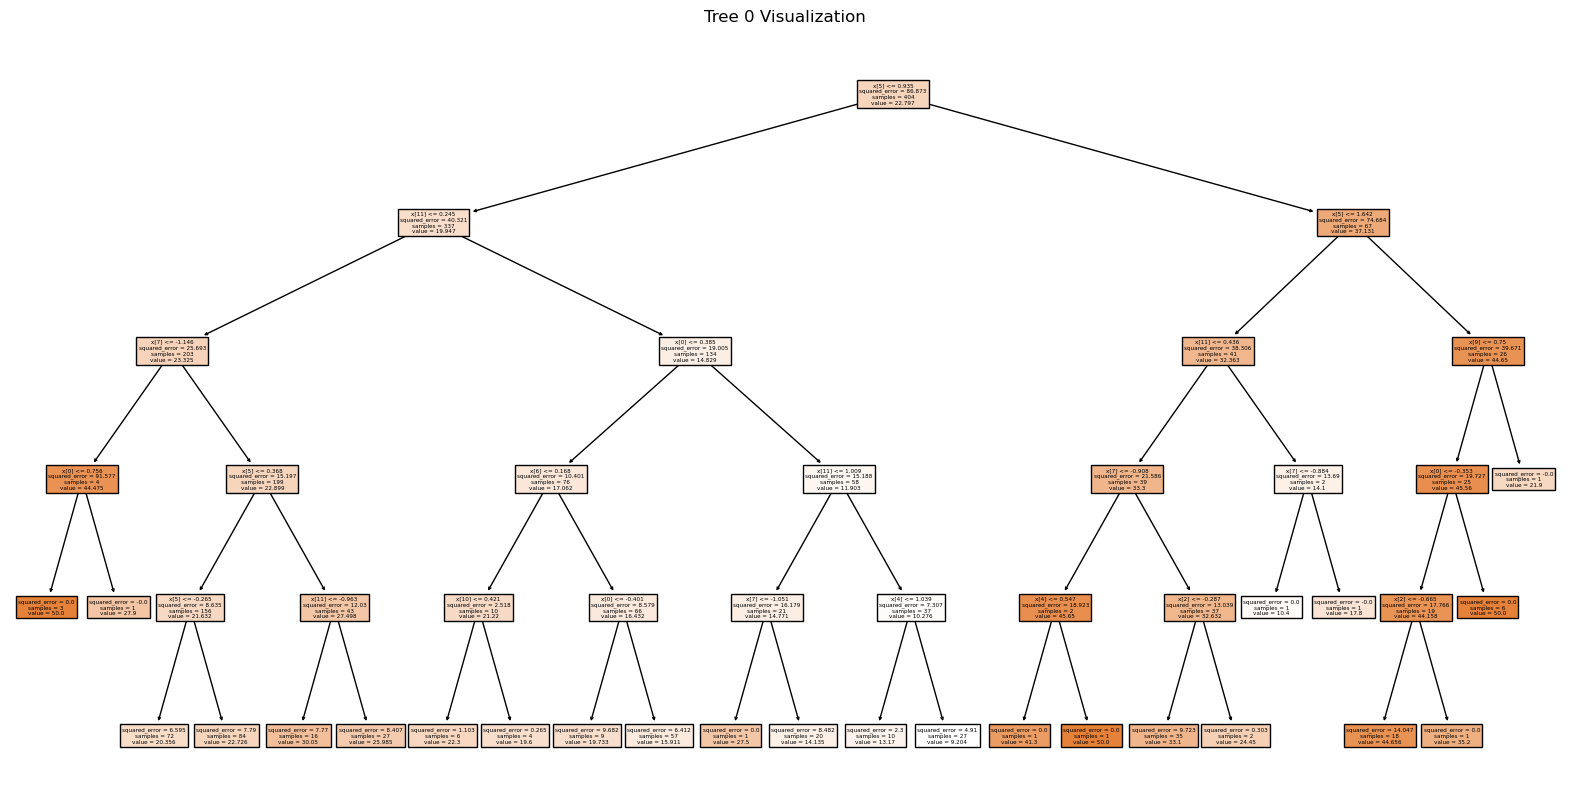

Tree 1 feature importances:
[5.22009741e-02 0.00000000e+00 7.01856623e-03 0.00000000e+00
 4.41037338e-03 6.29222250e-01 6.17612617e-03 7.18728865e-02
 0.00000000e+00 1.17395935e-03 5.42729365e-04 2.27382135e-01]
Tree 1 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_11 <= -0.30
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_11 >  -0.30
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- fe

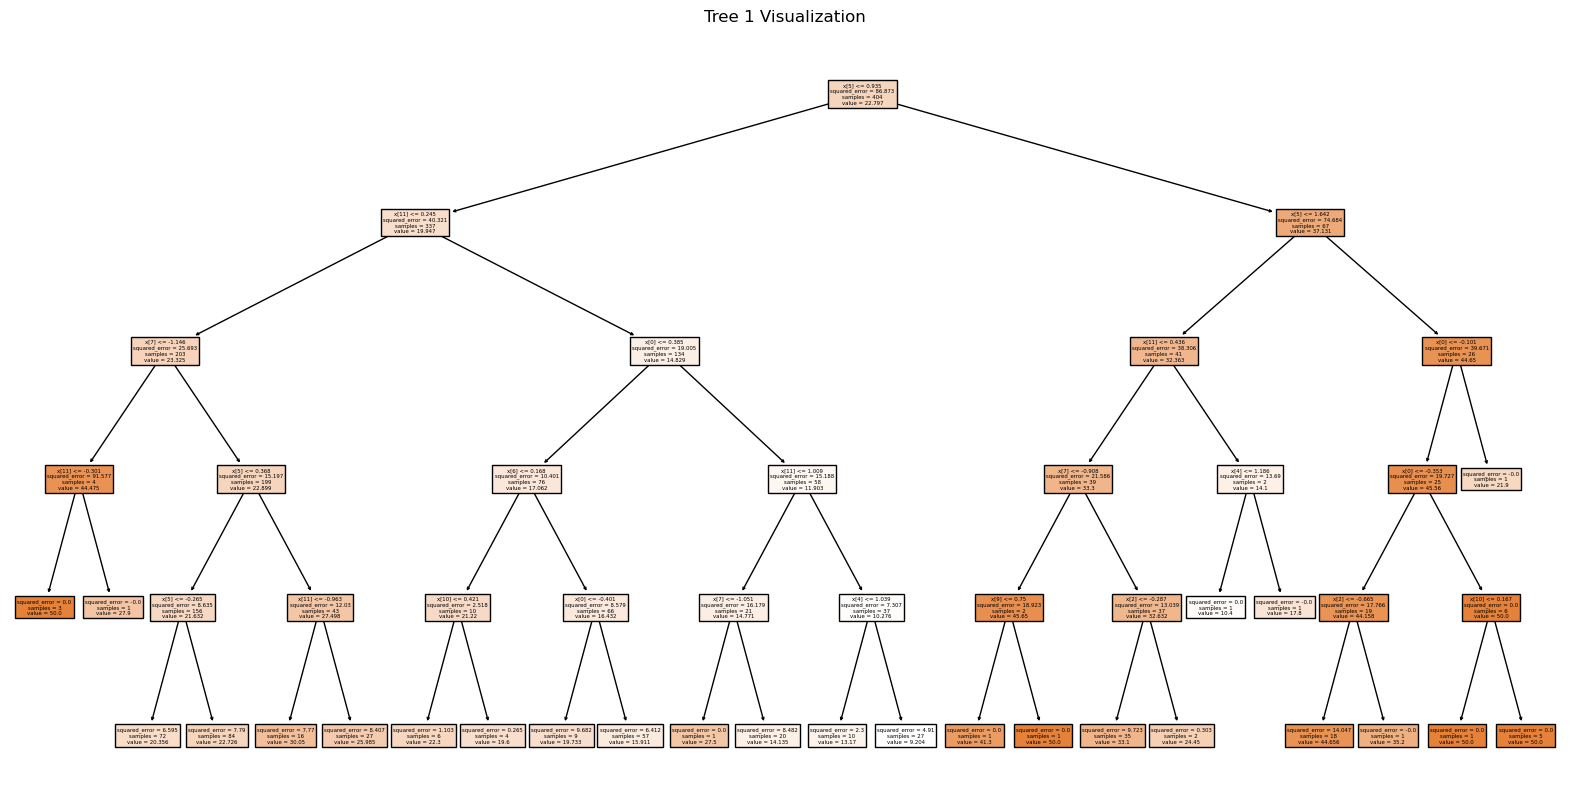

Tree 2 feature importances:
[0.08531884 0.         0.00701857 0.         0.00356104 0.63449932
 0.00702546 0.06659581 0.         0.         0.00171669 0.19426427]
Tree 2 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_0 <= 0.76
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_0 >  0.76
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |--- value: [22.

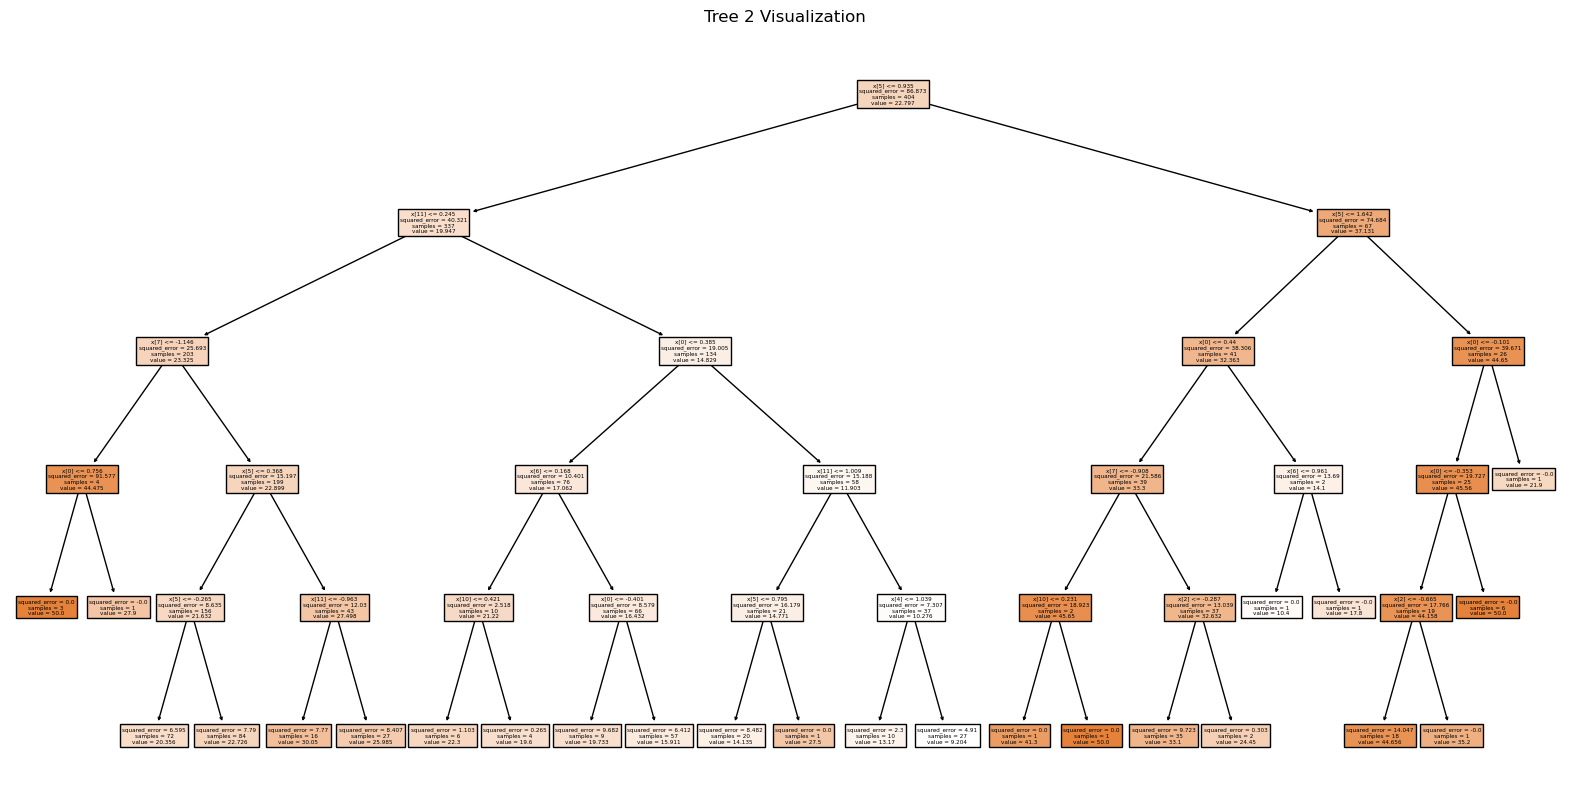

Tree 3 feature importances:
[7.39559073e-02 0.00000000e+00 7.01856623e-03 0.00000000e+00
 4.41037338e-03 6.34499324e-01 6.17612617e-03 6.77697719e-02
 0.00000000e+00 0.00000000e+00 5.42729365e-04 2.05627202e-01]
Tree 3 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_11 <= -0.30
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_11 >  -0.30
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- fe

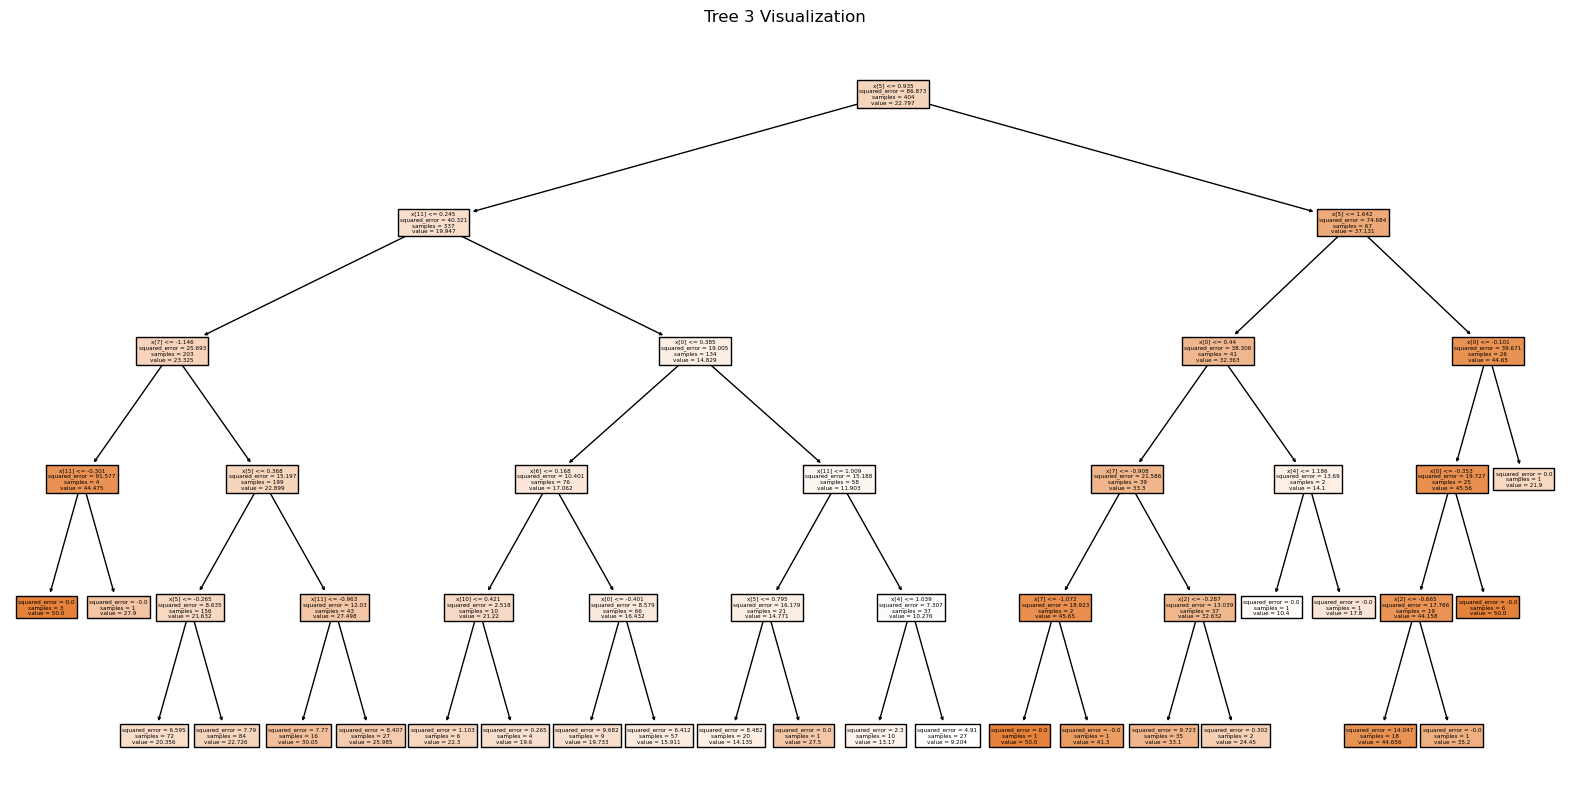

Tree 4 feature importances:
[0.05220097 0.         0.00701857 0.         0.004735   0.63007158
 0.00617613 0.07187289 0.         0.         0.01190566 0.2160192 ]
Tree 4 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_10 <= -0.18
|   |   |   |   |--- value: [27.90]
|   |   |   |--- feature_10 >  -0.18
|   |   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |--- value: 

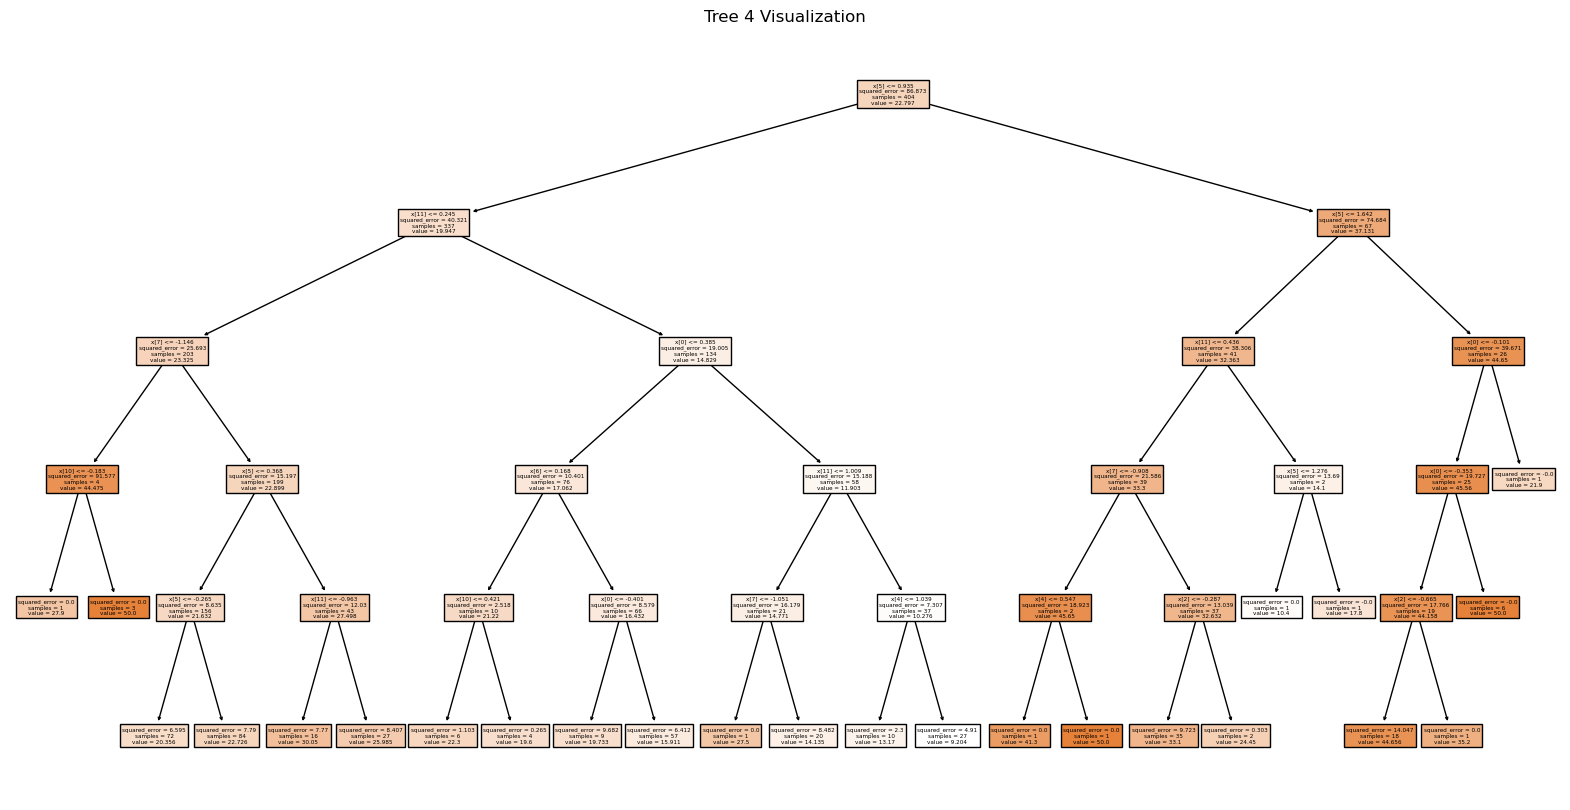

Tree 5 feature importances:
[0.05220097 0.         0.00701857 0.         0.00441037 0.63449932
 0.00735009 0.06659581 0.         0.         0.01190566 0.2160192 ]
Tree 5 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_10 <= -0.18
|   |   |   |   |--- value: [27.90]
|   |   |   |--- feature_10 >  -0.18
|   |   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |--- value: 

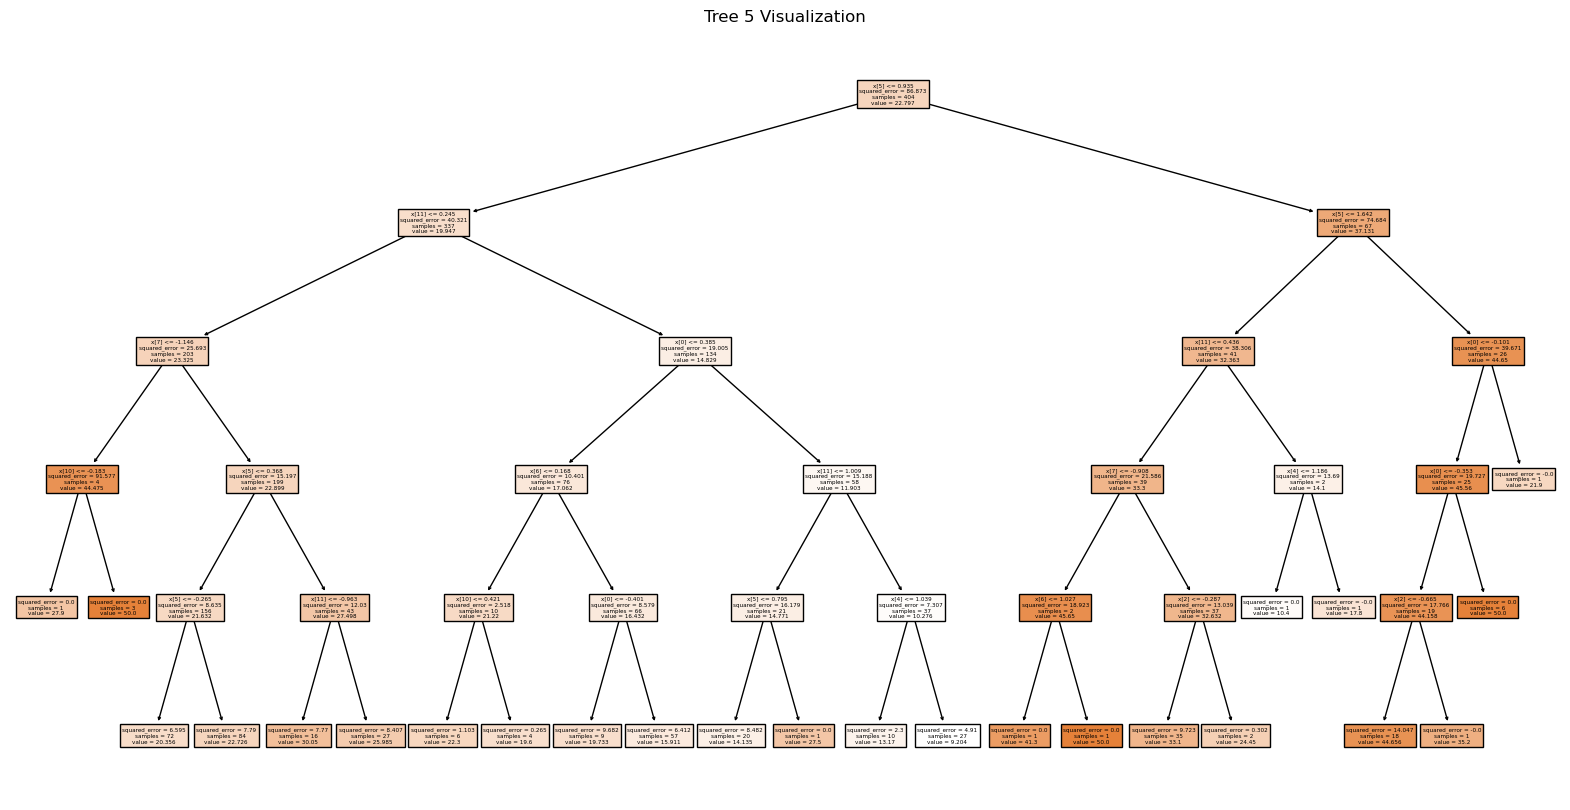

Tree 6 feature importances:
[5.22009741e-02 0.00000000e+00 7.01856623e-03 0.00000000e+00
 4.73499974e-03 6.29222250e-01 6.17612617e-03 7.27222195e-02
 0.00000000e+00 0.00000000e+00 5.42729365e-04 2.27382135e-01]
Tree 6 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_11 <= -0.30
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_11 >  -0.30
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- fe

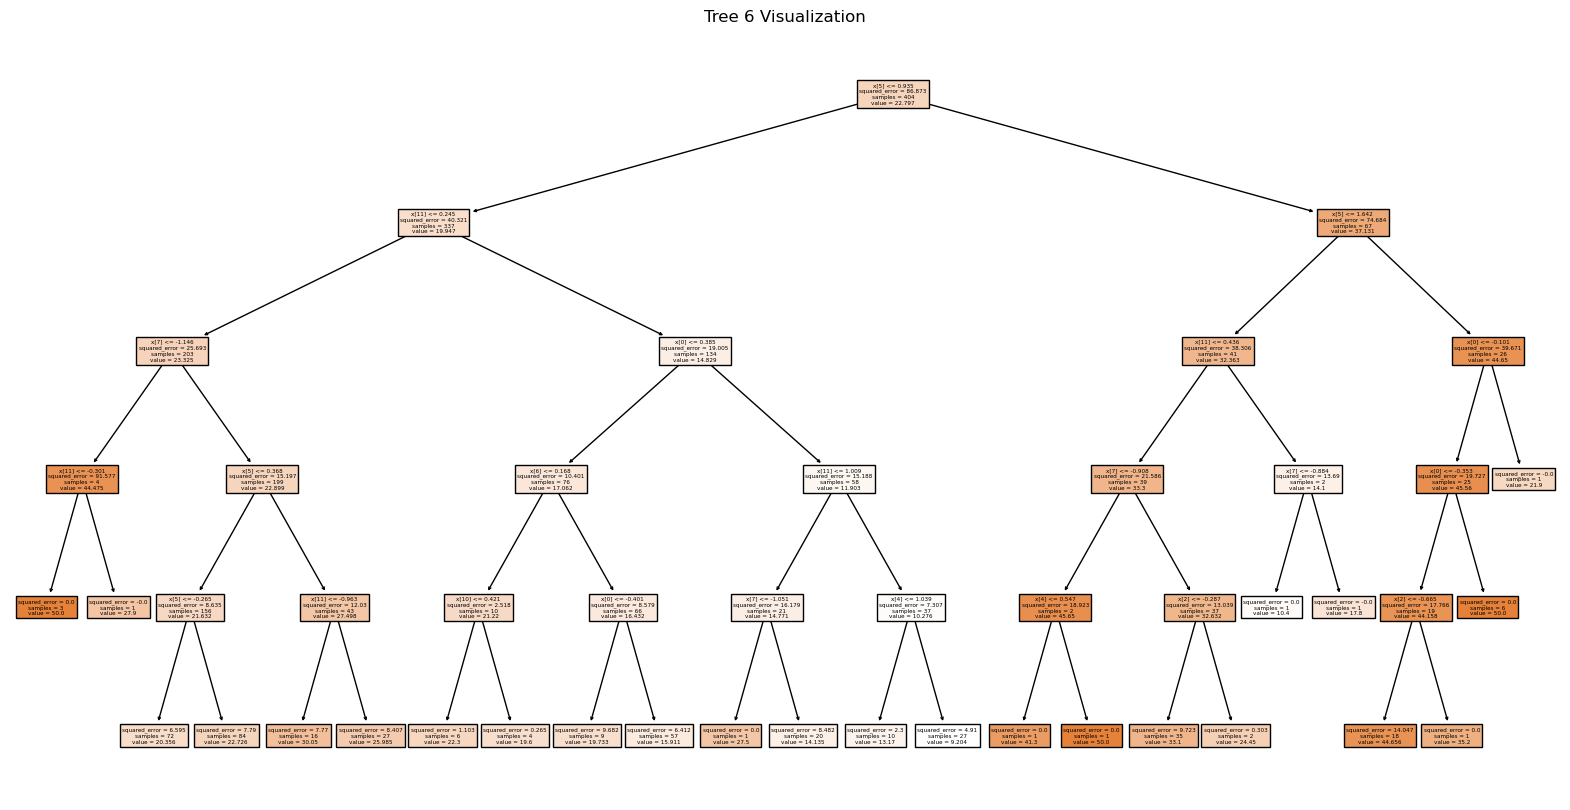

Tree 7 feature importances:
[0.05725882 0.         0.00701857 0.         0.00356104 0.6532197
 0.00617613 0.06659581 0.         0.         0.01190566 0.19426427]
Tree 7 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_10 <= -0.18
|   |   |   |   |--- value: [27.90]
|   |   |   |--- feature_10 >  -0.18
|   |   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |--- value: [

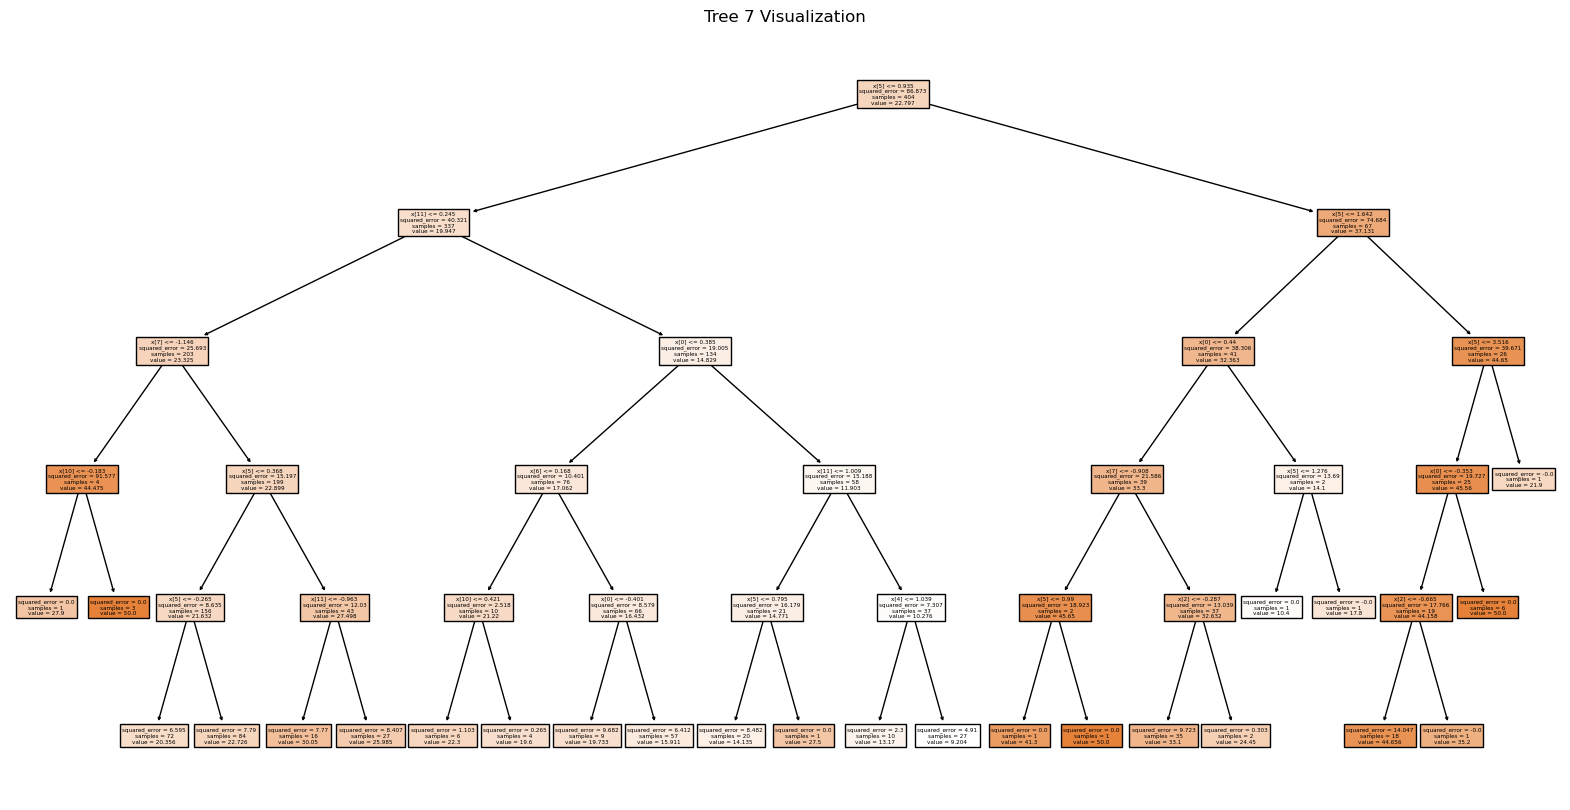

Tree 8 feature importances:
[0.03550389 0.         0.00701857 0.         0.00356104 0.62922225
 0.00702546 0.07187289 0.01669709 0.         0.01190566 0.21719316]
Tree 8 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_10 <= -0.18
|   |   |   |   |--- value: [27.90]
|   |   |   |--- feature_10 >  -0.18
|   |   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |--- value: 

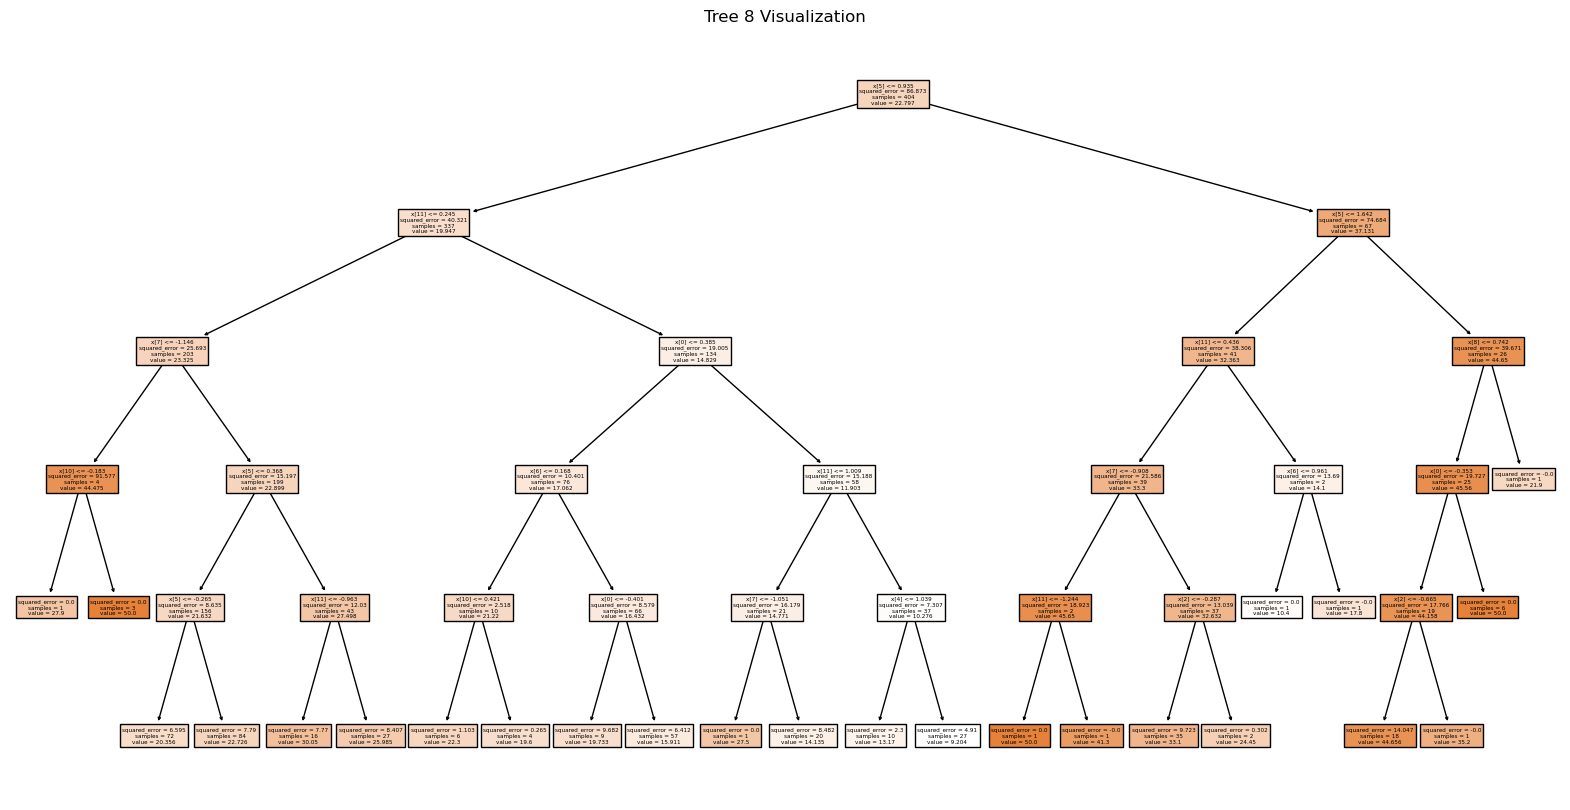

Tree 9 feature importances:
[3.55038879e-02 0.00000000e+00 7.01856623e-03 0.00000000e+00
 2.61653065e-02 6.34499324e-01 6.17612617e-03 6.65958126e-02
 1.66970863e-02 1.17395935e-03 5.42729365e-04 2.05627202e-01]
Tree 9 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_11 <= -0.30
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_11 >  -0.30
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- fe

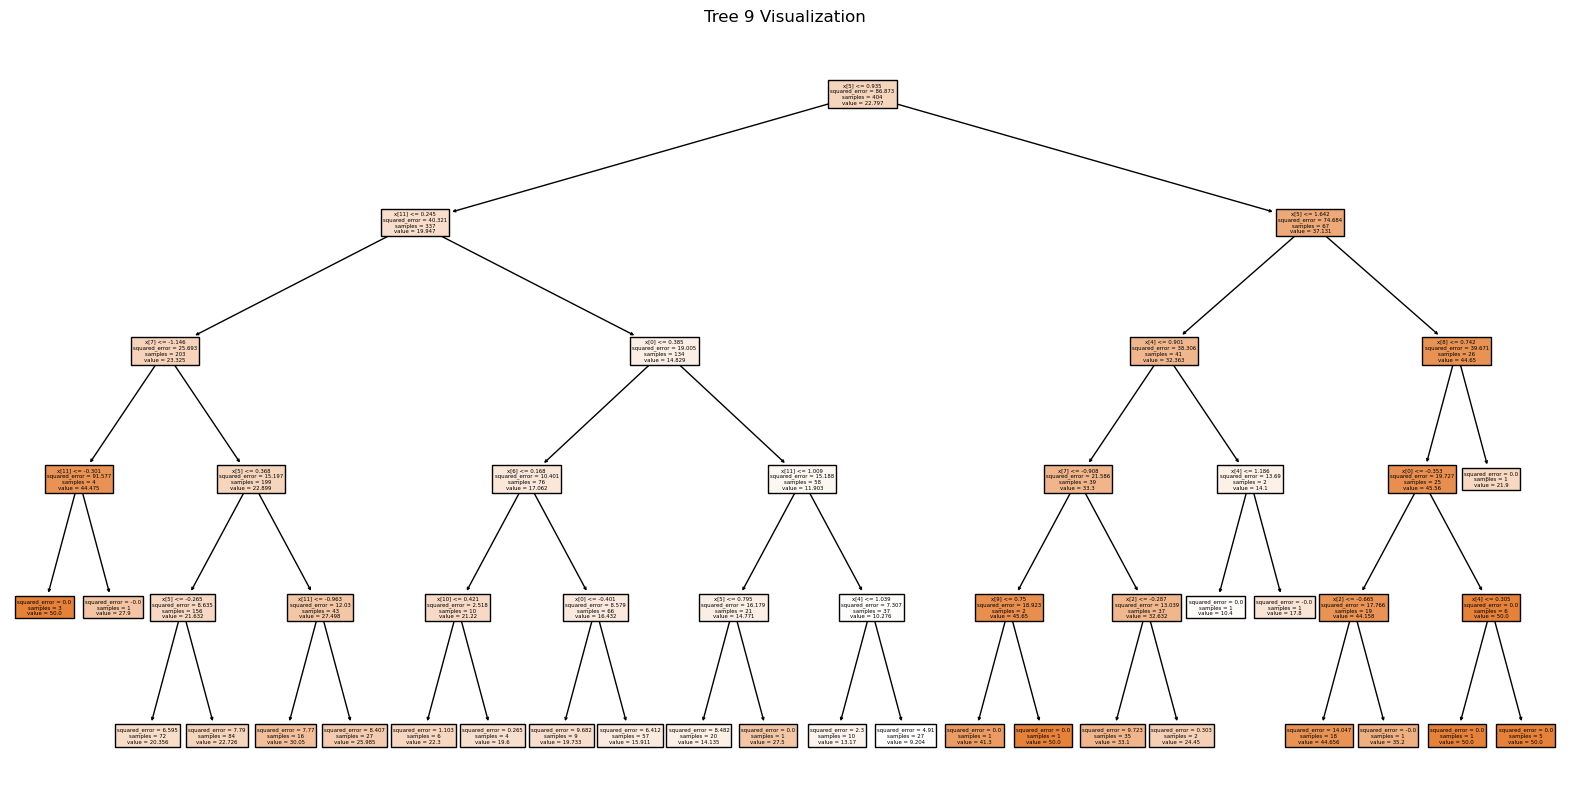

In [ ]:
# Get and print tree importances
tree_importances = models["FONN2"].trees.get_tree_importances()